## Kucoin Analysis

In [1]:
%matplotlib inline
from kucoin.client import Client
from pprint import pprint
from configs import *
import pandas as pd
import talib
import mplfinance as mpf

import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)

from datetime import datetime, timedelta
time_period = 60 #days
time_start = datetime.timestamp(datetime.now() - timedelta(days=time_period))
#print (time_start)
utc_offset = 8 #hours

symbol = 'DOT-USDT'
interval = '1day'

client = Client(api_key, api_secret, api_passphrase)

def get_klines_df(symbol,interval,time_start):
    # get symbol klines
    klines = client.get_kline_data(symbol,interval,start=int(time_start))
    #pprint(klines)

    #Create empty DataFrame with specific column types
    df = pd.DataFrame({'Timestamp': pd.Series(dtype='float'),
                    'Open': pd.Series(dtype='float'),
                    'Close': pd.Series(dtype='float'),
                    'High': pd.Series(dtype='float'),
                    'Low': pd.Series(dtype='float'),
                    'Volume': pd.Series(dtype='float'),
                    'Amount': pd.Series(dtype='float')})

    for item in klines:
        data = {'Timestamp': float(item[0]),
                    'Open': float(item[1]),
                    'Close': float(item[2]),
                    'High': float(item[3]),
                    'Low': float(item[4]),
                    'Volume': float(item[5]),
                    'Amount': float(item[6])}
        df = df.append(data, ignore_index=True)

    df = df.sort_values("Timestamp", ascending=True, ignore_index=True)

    df['Date'] = pd.to_datetime(df['Timestamp'],unit='s')
    #df['date'] = df['date'] + pd.DateOffset(hours=utc_offset)
    df = df.set_index('Date')
    df['morning_star'] = talib.CDLMORNINGSTAR(df['Open'],df['High'],df['Low'],df['Close'])
    df['engulfing'] = talib.CDLENGULFING(df['Open'],df['High'],df['Low'],df['Close'])
    
    return df

df = get_klines_df(symbol,interval,time_start)

close = df['Close']
rsi = talib.RSI(close, timeperiod=14)
upperBB, middleBB, lowerBB = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
upperBBrsi, MiddleBBrsi, lowerBBrsi = talib.BBANDS(rsi, timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)
normrsi = (rsi - lowerBBrsi) / (upperBBrsi - lowerBBrsi)

df['rsi'] = rsi
df['upperBB'] = rsi
df['middleBB'] = rsi
df['lowerBB'] = rsi
df['upperBBrsi'] = rsi
df['MiddleBBrsi'] = rsi
df['lowerBBrsi'] = rsi
df['normrsi'] = rsi



In [2]:
engulfing_days = df[df['engulfing'] != 0]
morningstar_days = df[df['morning_star'] != 0]

In [3]:
morningstar_days

,Timestamp,Open,Close,High,Low,Volume,Amount,morning_star,engulfing,rsi,upperBB,middleBB,lowerBB,upperBBrsi,MiddleBBrsi,lowerBBrsi,normrsi
Date,,,,,,,,,,,,,,,,,


In [4]:
df

,Timestamp,Open,Close,High,Low,Volume,Amount,morning_star,engulfing,rsi,upperBB,middleBB,lowerBB,upperBBrsi,MiddleBBrsi,lowerBBrsi,normrsi
Date,,,,,,,,,,,,,,,,,
2021-11-21,1.637453e+09,42.0898,41.9116,43.5733,40.6563,1.041337e+06,4.354717e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-22,1.637539e+09,41.9623,39.4652,42.1692,38.8172,1.077982e+06,4.326854e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-23,1.637626e+09,39.4781,40.7699,41.4783,38.5360,1.024448e+06,4.107253e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-24,1.637712e+09,40.7553,38.2791,40.9071,38.0500,1.060348e+06,4.150689e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-25,1.637798e+09,38.2776,39.4357,40.9272,38.0439,1.103186e+06,4.358445e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-26,1.637885e+09,39.4814,34.5573,39.6256,33.1500,1.909281e+06,6.897229e+07,0,-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27,1.637971e+09,34.5546,35.1504,35.9388,34.4300,9.196939e+05,3.247190e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-28,1.638058e+09,35.1373,35.7555,35.8500,32.2036,1.149317e+06,3.890153e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-29,1.638144e+09,35.7615,37.0881,37.5266,35.3837,1.249894e+06,4.554200e+07,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


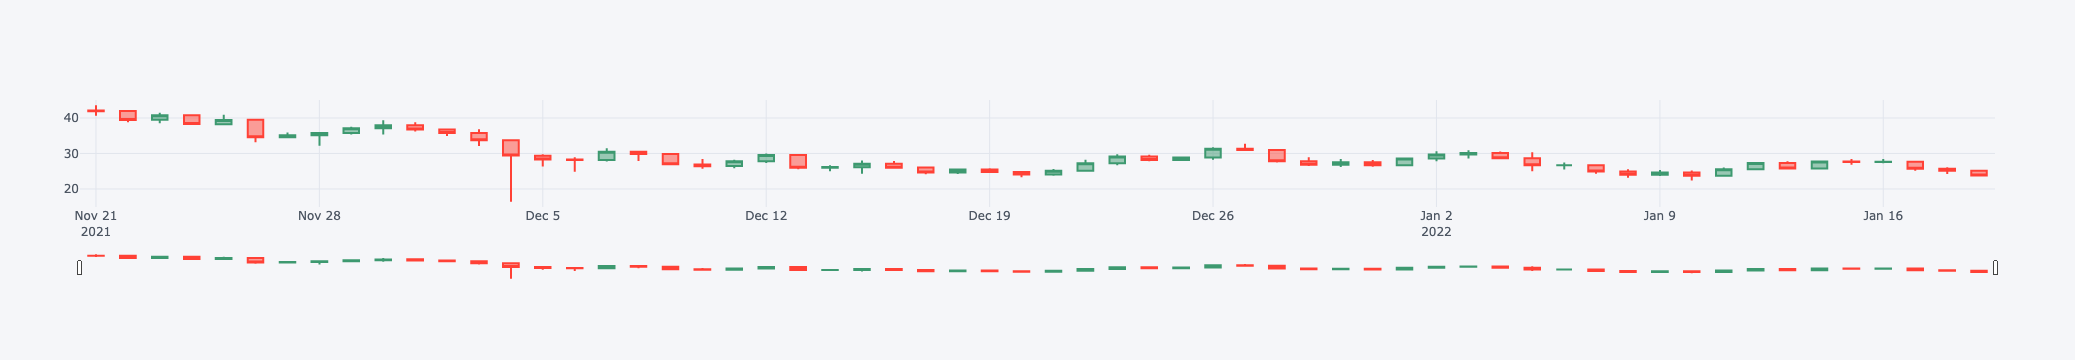

In [5]:
df.iplot(kind="candle", keys=["Open", "High", "Low", "Close"], rangeslider=True)

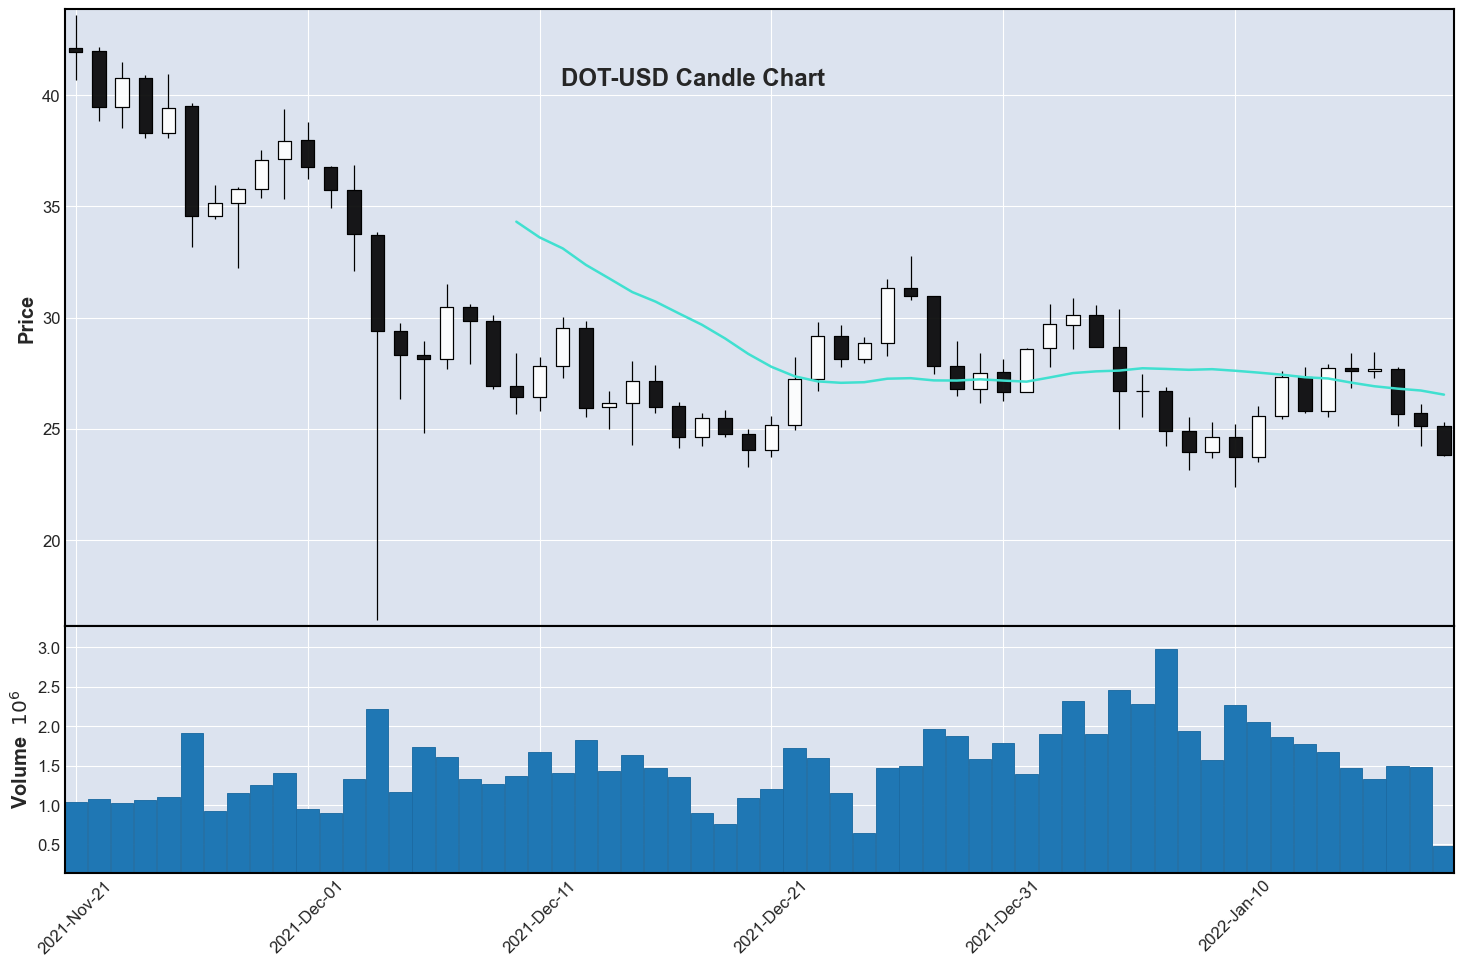

In [6]:
mpf.plot(df,type='candle',volume=True,figsize=(16,10),tight_layout=True,title='DOT-USD Candle Chart',mav=20)

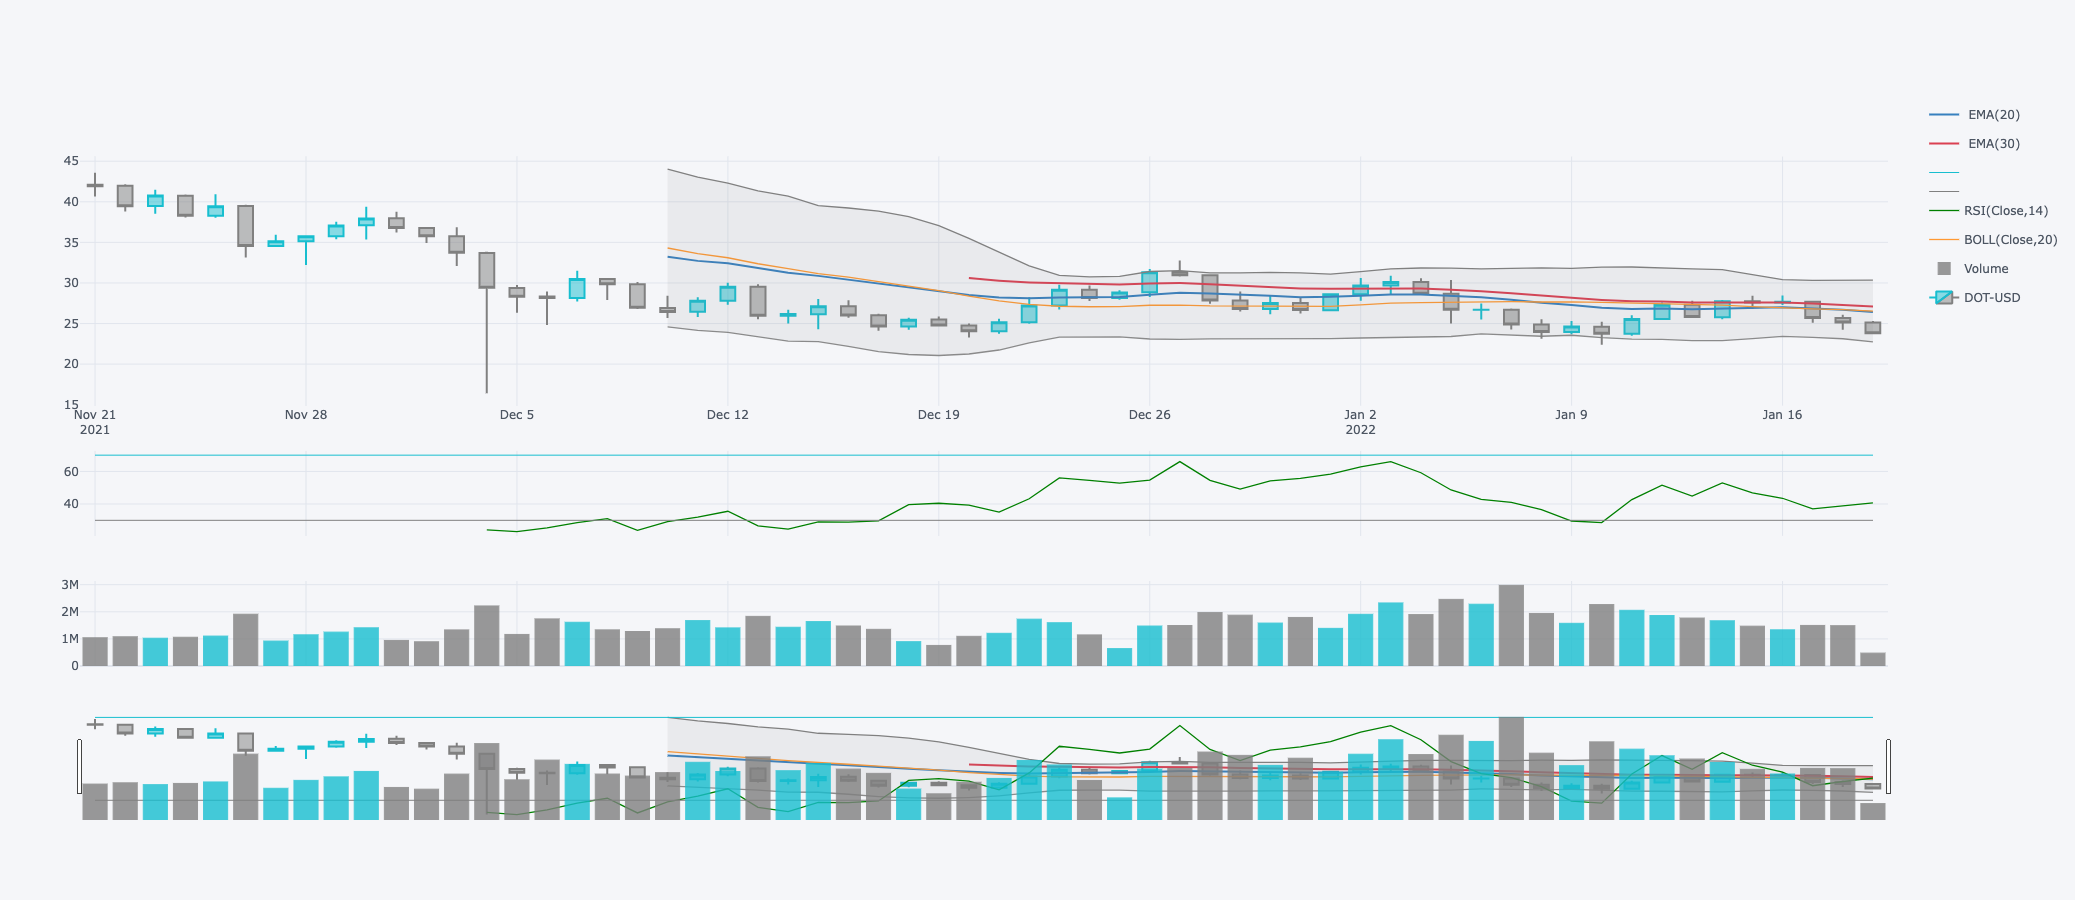

In [10]:
layout1 = cf.Layout(
    height=900,
    width=1200
)

qf = cf.QuantFig(df, title="DOT stock price", name='DOT-USD')
qf.add_ema([20, 30], width=2, color=['blue', 'red'])
qf.add_rsi(periods=14, color='green')
qf.add_bollinger_bands(periods=20, boll_std=2 ,colors=['orange','grey'], fill=True)
qf.add_volume()
#qf.add_macd()
qf.iplot(layout=layout1)
